# Introduction to Neural Networks

## Import packages

In [3]:
# from keras.datasets import mnist
# from keras.preprocessing.image import load_img, array_to_img
# from keras.utils.np_utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
with open("../data/interim/all_features.pkl", "rb") as f:
    legit_words = pickle.load(f)

In [7]:
legit_words

,url,status,ext_host,tlds,len_url,len_url_log,len_host,len_host_log,len_tld,len_tld_log,...,plus_probability_log,sum_spe_prob_log,similarity_index_legit,similarity_index_phi,similarity_index_legit_log,similarity_index_phi_log,english_words_url,english_word_count_url,english_words_host,english_word_count_host
0,0000111servicehelpdesk.godaddysites.com,0,0000111servicehelpdesk.godaddysites.com,com,39,3.688879,39,3.688879,3,1.386294,...,0.0,0.0,0,2,0.0,1.098612,[],0,[],0
1,000011accesswebform.godaddysites.com,0,000011accesswebform.godaddysites.com,com,36,3.610918,36,3.610918,3,1.386294,...,0.0,0.0,0,1,0.0,0.693147,[],0,[],0
2,00003.online,0,00003.online,online,12,2.564949,12,2.564949,6,1.945910,...,0.0,0.0,0,0,0.0,0.000000,[],0,[],0
3,0009servicedeskowa.godaddysites.com,0,0009servicedeskowa.godaddysites.com,com,35,3.583519,35,3.583519,3,1.386294,...,0.0,0.0,0,1,0.0,0.693147,[],0,[],0
4,000n38p.wcomhost.com,0,000n38p.wcomhost.com,com,20,3.044522,20,3.044522,3,1.386294,...,0.0,0.0,0,0,0.0,0.000000,"[n, p]",2,"[n, p]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807612,zzufg.com,0,zzufg.com,com,9,2.302585,9,2.302585,3,1.386294,...,0.0,0.0,0,0,0.0,0.000000,[],0,[],0
807613,zzu.li,0,zzu.li,li,6,1.945910,6,1.945910,2,1.098612,...,0.0,0.0,0,0,0.0,0.000000,[li],1,[li],1
807614,zzz.co.uk,0,zzz.co.uk,uk,9,2.302585,9,2.302585,2,1.098612,...,0.0,0.0,0,0,0.0,0.000000,[],0,[],0
807615,zzzoolight.co.za,0,zzzoolight.co.za,za,16,2.833213,16,2.833213,2,1.098612,...,0.0,0.0,0,0,0.0,0.000000,[za],1,[za],1


In [15]:
legit_words[legit_words['similarity_index_legit'] == 2]

,url,status,ext_host,tlds,len_url,len_url_log,len_host,len_host_log,len_tld,len_tld_log,...,plus_probability_log,sum_spe_prob_log,similarity_index_legit,similarity_index_phi,similarity_index_legit_log,similarity_index_phi_log,english_words_url,english_word_count_url,english_words_host,english_word_count_host
37370,mecklenburg-chapter-schwerin.de/GOID/afab3e970...,0,mecklenburg-chapter-schwerin.de,de,69,4.248495,31,3.465736,2,1.098612,...,0.0,0.000000,2,0,1.098612,0.0,"[chapter, de, e, d, b, b, d, ad]",8,"[chapter, de]",2
38446,mecklenburg-chapter-schwerin.de/GOID/afab3e970...,0,mecklenburg-chapter-schwerin.de,de,69,4.248495,31,3.465736,2,1.098612,...,0.0,0.000000,2,0,1.098612,0.0,"[chapter, de, e, d, b, b, d, ad]",8,"[chapter, de]",2
226362,tomtownsend-toyland.com/toyland_farms/toyland_...,1,tomtownsend-toyland.com,com,55,4.025352,23,3.178054,3,1.386294,...,0.0,0.035718,2,0,1.098612,0.0,"[toyland, toyland, toyland]",3,[toyland],1
229689,franolic-flyreels.com/english/indexe.htm,1,franolic-flyreels.com,com,40,3.713572,21,3.091042,3,1.386294,...,0.0,0.000000,2,0,1.098612,0.0,[],0,[],0
230702,peruvian-pasos.com/cellar/cellarnot.html,1,peruvian-pasos.com,com,40,3.713572,18,2.944439,3,1.386294,...,0.0,0.000000,2,0,1.098612,0.0,[cellar],1,[],0
232007,crye-leike.com/auctions,1,crye-leike.com,com,23,3.178054,14,2.708050,3,1.386294,...,0.0,0.000000,2,0,1.098612,0.0,[],0,[],0
232944,crye-leike.com/franchises,1,crye-leike.com,com,25,3.258097,14,2.708050,3,1.386294,...,0.0,0.000000,2,0,1.098612,0.0,[],0,[],0
235764,mipagina.euskaltel.es/javmar,1,mipagina.euskaltel.es,es,28,3.367296,21,3.091042,2,1.098612,...,0.0,0.000000,2,0,1.098612,0.0,[es],1,[es],1
237315,iitg.ernet.in/cse,1,iitg.ernet.in,in,17,2.890372,13,2.639057,2,1.098612,...,0.0,0.000000,2,0,1.098612,0.0,[in],1,[in],1
237338,mathematik.uni-kassel.de/index-eng.html,1,mathematik.uni-kassel.de,de,39,3.688879,24,3.218876,2,1.098612,...,0.0,0.000000,2,0,1.098612,0.0,"[de, index]",2,[de],1


## Load the data

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [13]:
X_train[0].shape

(28, 28)

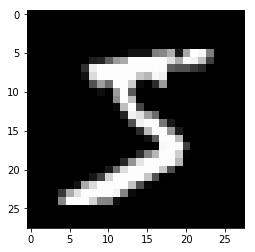

In [15]:
plt.imshow(X_train[0],cmap='gray')

In [16]:
y_train[0]

5

## Preprocessing the image data

In [17]:
image_height,image_width = 28,28

In [20]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [22]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [23]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

## Build a model

## Compile the model

## Train the model

## What is the accuracy of the model?

### Plot the accuracy of the training model

### Plot the accuracy of training and validation set

### Accuracy of training and validation with loss

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons.
- What results do you get when trying to use another activation function?
- Try a new dataset with your own neural network and see what accuracy you get.

# Convolution Neural Network

## Import the libraries

In [109]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [110]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [111]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [112]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

In [113]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [114]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                650       
Total para

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 73s - loss: 0.1546 - acc: 0.9524 - val_loss: 0.0521 - val_acc: 0.9845
Epoch 2/20
60000/60000 [==============================] - 75s - loss: 0.0488 - acc: 0.9845 - val_loss: 0.0301 - val_acc: 0.9913
Epoch 3/20
60000/60000 [==============================] - 75s - loss: 0.0350 - acc: 0.9890 - val_loss: 0.0204 - val_acc: 0.9939
Epoch 4/20
60000/60000 [==============================] - 75s - loss: 0.0272 - acc: 0.9912 - val_loss: 0.0185 - val_acc: 0.9938
Epoch 5/20
60000/60000 [==============================] - 74s - loss: 0.0205 - acc: 0.9934 - val_loss: 0.0121 - val_acc: 0.9964
Epoch 6/20
60000/60000 [==============================] - 75s - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0086 - val_acc: 0.9974
Epoch 7/20
60000/60000 [==============================] - 75s - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0090 - val_acc: 0.9970
Epoch 8/20
60000/60000 [==============================

Recall that when using neural networks we got good accuracy.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
